In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath = '../input/complete_details_ap.csv'
fieldNames = ["Latitude","Longitude","Soil_type","Extent_AC","Crop_type","pH","EC","OC","Avail_P","Exch_K","Avail_Ca","Avail_Mg","Avail_S","Avail_Zn","Avail_B","Avail_Fe","Avail_Cu","Avail_Mn"]

#df = pd.read_csv(filePath)
df = pd.read_csv(filePath, usecols = fieldNames)
df.head()

,Latitude,Longitude,Soil_type,Extent_AC,Crop_type,pH,EC,OC,Avail_P,Exch_K,Avail_Ca,Avail_Mg,Avail_S,Avail_Zn,Avail_B,Avail_Fe,Avail_Cu,Avail_Mn
0,14.08,77.69,Mixed soil,2.37,G.Nut,6.19,0.07,0.18,7.13,41,587,101,5.16,0.30,0.17,8.89,0.51,15.24
1,14.09,77.69,Redsoil,1.23,G.Nut,8.40,0.33,0.31,10.34,102,811,261,9.91,0.36,0.57,3.24,0.44,6.90
2,14.09,77.69,Mixed soil,2.00,G.Nut,7.10,0.11,0.17,8.46,46,582,48,3.77,0.37,0.19,5.54,0.42,8.34
3,14.10,77.70,Sandi soil,1.36,Horsegram,8.30,0.21,0.20,2.31,35,3048,52,4.14,0.23,0.21,1.79,0.67,4.17
4,14.09,77.69,Mixed soil,1.50,Horsegram,6.40,0.06,0.22,6.08,76,511,84,1.45,0.36,0.22,22.26,0.45,9.20


In [3]:
df.describe()

,Latitude,Longitude,pH,EC,OC,Avail_P,Exch_K,Avail_Ca,Avail_Mg,Avail_S,Avail_Zn,Avail_B,Avail_Fe,Avail_Cu,Avail_Mn
count,4815.000000,4815.000000,4815.000000,4815.000000,4813.000000,4815.000000,4815.000000,4815.000000,4815.000000,4814.000000,4815.000000,4814.000000,4815.000000,4815.000000,4815.000000
mean,15.932941,80.482434,7.477844,0.489531,0.476131,16.704285,159.676012,2416.086604,522.878920,47.995798,1.111973,1.165897,28.349657,2.533325,18.805155
std,1.737067,2.046098,1.052134,1.045581,0.255921,18.810818,135.616280,2155.234533,473.764527,116.114801,1.396243,1.004542,38.578050,3.061383,18.965475
min,12.810000,75.280000,4.150000,0.010000,0.010000,0.450000,12.000000,20.000000,2.000000,0.100000,0.030000,0.030000,0.040000,0.030000,0.010000
25%,14.520000,78.820000,6.740000,0.110000,0.290000,5.160000,82.000000,839.000000,184.000000,4.630000,0.410000,0.460000,5.780000,0.930000,8.100000
50%,15.550000,80.080000,7.810000,0.220000,0.430000,10.930000,129.000000,1652.000000,374.000000,11.010000,0.700000,0.880000,12.210000,1.460000,12.960000
75%,17.680000,82.420000,8.270000,0.510000,0.620000,21.410000,196.000000,3150.500000,715.500000,34.655000,1.250000,1.577500,33.980000,2.600000,22.125000
max,18.800000,84.190000,9.890000,27.500000,2.640000,361.940000,2409.000000,13304.000000,5363.000000,2539.580000,23.920000,13.730000,354.700000,20.180000,256.880000


In [4]:
#df['Lable_Crop_type'] = df['Crop_type']

df = df.drop("Crop_type",1)
df = df.drop("Soil_type",1)
df = df.drop("Extent_AC",1)

df = df.apply(pd.to_numeric)

X = df.iloc[:,:].values
#Y = df.iloc[:,-1].values


In [5]:
print(X[0:10])

[[1.408e+01 7.769e+01 6.190e+00 7.000e-02 1.800e-01 7.130e+00 4.100e+01
  5.870e+02 1.010e+02 5.160e+00 3.000e-01 1.700e-01 8.890e+00 5.100e-01
  1.524e+01]
 [1.409e+01 7.769e+01 8.400e+00 3.300e-01 3.100e-01 1.034e+01 1.020e+02
  8.110e+02 2.610e+02 9.910e+00 3.600e-01 5.700e-01 3.240e+00 4.400e-01
  6.900e+00]
 [1.409e+01 7.769e+01 7.100e+00 1.100e-01 1.700e-01 8.460e+00 4.600e+01
  5.820e+02 4.800e+01 3.770e+00 3.700e-01 1.900e-01 5.540e+00 4.200e-01
  8.340e+00]
 [1.410e+01 7.770e+01 8.300e+00 2.100e-01 2.000e-01 2.310e+00 3.500e+01
  3.048e+03 5.200e+01 4.140e+00 2.300e-01 2.100e-01 1.790e+00 6.700e-01
  4.170e+00]
 [1.409e+01 7.769e+01 6.400e+00 6.000e-02 2.200e-01 6.080e+00 7.600e+01
  5.110e+02 8.400e+01 1.450e+00 3.600e-01 2.200e-01 2.226e+01 4.500e-01
  9.200e+00]
 [1.409e+01 7.769e+01 7.780e+00 1.400e-01 2.100e-01 5.680e+00 4.400e+01
  1.161e+03 7.100e+01 2.200e+00 6.900e-01 2.380e+00 2.830e+00 6.400e-01
  4.410e+00]
 [1.409e+01 7.769e+01 6.300e+00 6.000e-02 2.800e-01 2.080e

In [6]:
X.shape

(4815, 15)

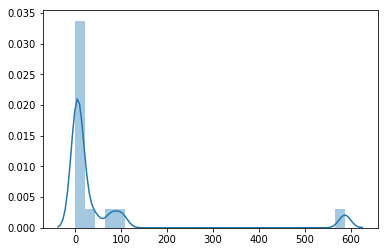

In [7]:
sns.distplot(X[0])


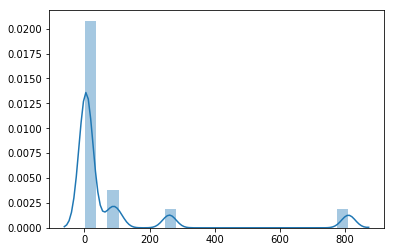

In [9]:
sns.distplot(X[1])


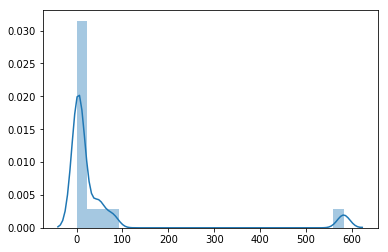

In [10]:
sns.distplot(X[2])


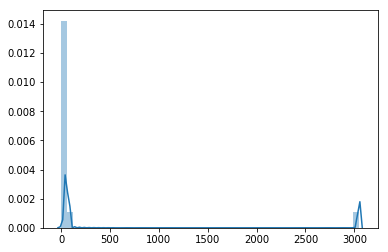

In [11]:
sns.distplot(X[3])


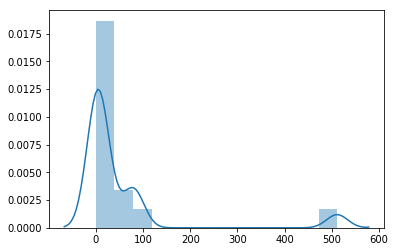

In [12]:
sns.distplot(X[4])


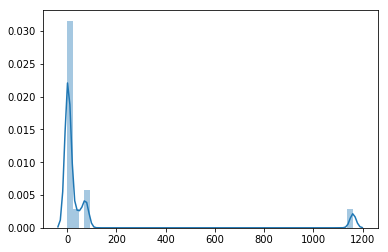

In [14]:
sns.distplot(X[5])

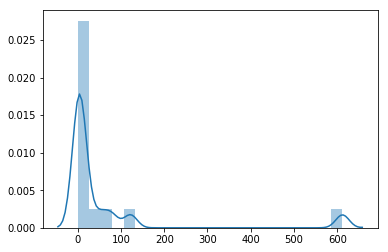

In [15]:
sns.distplot(X[6])


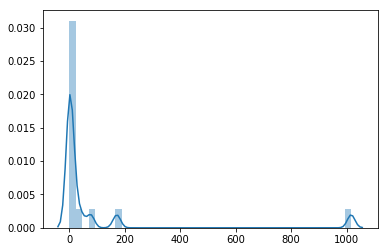

In [17]:
sns.distplot(X[7])


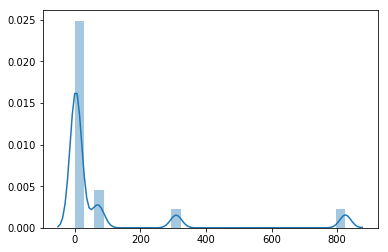

In [19]:
sns.distplot(X[8])

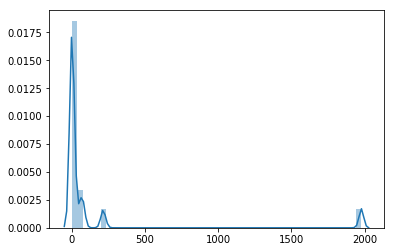

In [20]:
sns.distplot(X[9])

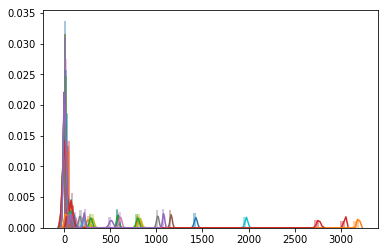

In [22]:
for i in range(0,15):
    sns.distplot(X[i])